# Stochastic Control 

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

## Simulation of the performance of different controls

In [47]:
# Simulation of our wealth
def OptimalWealthSimulation(X, K, mu, r,sigma, gamma,rho, N, M, T):
    dt = 1/N
    pi = (mu - r) / (gamma * sigma**2)

    alpha = (1/gamma) * (r*(1-gamma) - rho + (1-gamma)* (mu-r)**2 /(2*gamma* sigma**2))

    def c(t, X):
        return ((K**(1/gamma) + 1/alpha)* np.exp(alpha * (T-t)) - 1/alpha)**(-1) * X 

    wealth_data = {}

    for sims in range(0, M):
        wealth_sim = [X]
        sim_wealth = X + ((r + (mu - r)*pi)*X - c(0,X))*dt + sigma*pi*X*np.sqrt(dt)*np.random.normal(0,1)
        wealth_sim.append(sim_wealth)

        for step in range(1, N):
            sim_wealth = sim_wealth + ((r + (mu - r)*pi)*sim_wealth - c(step/N, sim_wealth))*dt + sigma*pi*sim_wealth*np.sqrt(dt)*np.random.normal(0,1)
            wealth_sim.append(sim_wealth)
        
        wealth_data[sims] = wealth_sim

    data = pd.DataFrame.from_dict(wealth_data,orient='columns')
    
    return data

(array([ 31., 122., 288., 267., 151.,  81.,  39.,  15.,   4.,   2.]),
 array([288.85875108, 359.87354193, 430.88833277, 501.90312362,
        572.91791446, 643.93270531, 714.94749616, 785.962287  ,
        856.97707785, 927.99186869, 999.00665954]),
 <a list of 10 Patch objects>)

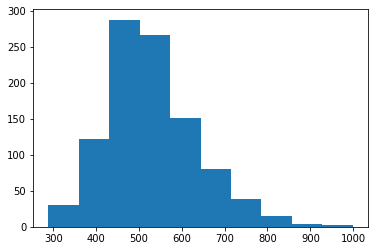

In [48]:
optimaldata = OptimalWealthSimulation(X = 1000, K = 1.0, mu=0.1, r=0.05, sigma=0.5, gamma=0.5, rho = 0.05, N=1000, M=1000, T=1)
plt.hist(optimaldata.iloc[-1])

In [49]:
np.mean(list(optimaldata.iloc[1000]))

530.3232971153187

In [50]:
# Performance criterion
def performance(data, K, gamma, r, mu, rho, sigma, T, N, M,C):
    term = []
    u1 = lambda x: x**(1-gamma)/(1-gamma)
    u2 = lambda x : K*(x**(1-gamma)) / (1-gamma)

    result = []

    for i in range(0, M):
        target = data.iloc[:,i]
        x_list = list(target)
        integral = []
        
        for j in range(0, N+1):
            integral.append(np.exp(-rho*(j/1000)) * u1(C(j/1000, x_list[j])))
        
        result.append(0.5*(T/N)*(integral[0] + 2*sum(integral[1:N+1])+ integral[-1]) + np.exp(-rho*T)*u2(x_list[-1]))
    
    return np.mean(result), np.std(result) 

In [52]:
X, K, mu, r, sigma, gamma, rho, T = 1000, 1, 0.1, 0.05, 0.5, 0.5, 0.05, 1 
alpha = (1/gamma) * (r*(1-gamma) - rho + (1-gamma)* (mu-r)**2 /(2*gamma* sigma**2))

def c(t, X):
    return ((K**(1/gamma) + 1/alpha)* np.exp(alpha * (T-t)) - 1/alpha)**(-1) * X 

optimal_mean, optimal_std = performance(data = optimaldata, K=1, gamma=0.5, r=0.05, mu=0.1, rho = 0.05, sigma = 0.5, T=1, N =1000, M=1000, C=c)
optimal_mean, optimal_std*1.96 / np.sqrt(1000)

(88.09692051815756, 0.4078929961541275)

$$ \frac{dW_t}{W_t} = (r + \frac{(\mu - r)^2}{\sigma^2 \gamma}  - \frac{1}{F(t)} )dt + \frac{(\mu -r)}{\sigma \gamma}dB_t$$


Expected Portfolio Return is constant over time ($= r + \frac{(\mu - r)^2}{\sigma^2 \gamma}$) \
Fractional Consumption $\frac{1}{F(t)}$ increases over time \
Expected Rate of Wealth Growth $r + \frac{(\mu - r)^2}{\sigma^2 \gamma} - \frac{1}{F(t)}$ decreases over time \
Wealth Growth Volatility is constant ($= \frac{\mu - r}{\sigma \gamma}$)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


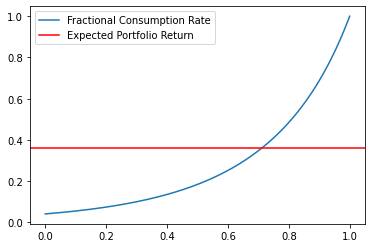

In [10]:
X, K, mu, r, sigma, gamma, rho, T = 1000, 1, 0.1, 0.05, 0.4, 0.05, 0.05, 1 
#gamma = 0.05 to see the cross 

alpha = (1/gamma) * (r*(1-gamma) - rho + (1-gamma)* (mu-r)**2 /(2*gamma* sigma**2))
F = lambda t: ((K**(1/gamma) + 1/alpha)* np.exp(alpha * (T-t)) - 1/alpha)**(-1) 

time = np.arange(0, 1 + 1/1000, 1/1000)
vfunc = np.vectorize(F)
plt.plot(time, vfunc(time), label = 'Fractional Consumption Rate')
plt.axhline(y = r + (mu-r)**2/(sigma**2 *gamma), color = 'r', label = 'Expected Portfolio Return')
plt.legend()
plt.savefig('return.eps',format = 'eps')

In [11]:
# Different Markov control 
def WealthSimulation(X, K, mu, r,sigma, gamma,rho, N, M, T, Pi, C):
    dt = 1/N

    wealth_data = {}

    for sims in range(0, M):
        wealth_sim = [X]
        sim_wealth = X + ((r + (mu - r)*Pi(0))*X - C(0,X))*dt + sigma*Pi(0)*X*np.sqrt(dt)*np.random.normal(0,1)
        wealth_sim.append(sim_wealth)

        for step in range(1, N):
            sim_wealth = sim_wealth + ((r + (mu - r)*Pi(step/N))*sim_wealth - C(step/N, sim_wealth))*dt + sigma*Pi(step/N)*sim_wealth*np.sqrt(dt)*np.random.normal(0,1)
            wealth_sim.append(sim_wealth)
        
        wealth_data[sims] = wealth_sim

    data = pd.DataFrame.from_dict(wealth_data,orient='columns')
    
    return data

In [12]:
gamma,rho,r,mu,sigma,k,T,x0 = 0.5,0.05,0.05,0.1,0.5,1,1,1000

N = 1000
M = 1000
theta = [gamma,rho,r,mu,sigma,k,T,x0]

def h(t,gamma,rho,r,mu,sigma,k,T):
    alpha = 1/gamma*(r*(1-gamma)-rho+(1-gamma)*(mu-r)**2/(2*sigma**2*gamma))
    h = (1/alpha+k**(1/gamma))*np.exp(alpha*(T-t))-1/alpha
    #print(alpha)
    return h

def f(t,gamma,rho,r,mu,sigma,k,T):
    f = h(t,gamma,rho,r,mu,sigma,k,T)**gamma
    return f

def g(x,gamma):
    g = x**(1-gamma)/(1-gamma)
    return g
    
def H(t,x,gamma,rho,r,mu,sigma,k,T):
    H = f(t,gamma,rho,r,mu,sigma,k,T)*g(x,gamma)
    return H

def pi_star(t,x,gamma,rho,r,mu,sigma,k,T):
    pi = (mu-r)/(gamma*sigma**2)
    return pi

def c_star(t,x,gamma,rho,r,mu,sigma,k,T):
    c = x/h(t,gamma,rho,r,mu,sigma,k,T)
    return c

def pi_1(t,x,gamma,rho,r,mu,sigma,k,T):
    return 0.4 + 0.6*t

def pi_2(t,x,gamma,rho,r,mu,sigma,k,T):
    return 1.0 - 0.4*t

def c_1(t,x,gamma,rho,r,mu,sigma,k,T):
    return 0.5*x
    
def c_2(t,x,gamma,rho,r,mu,sigma,k,T):
    return 0.8*np.exp(np.log(1/2)*t) * x

def simulation_x(theta,pi,c,N,M):
    gamma,rho,r,mu,sigma,k,T,x0 = theta
    spot = np.zeros((N+1,M))
    spot[0,:] = x0
    dt = T/N
    t = np.arange(0,T+dt,dt)
    diffusion = np.sqrt(dt)*sigma*np.random.normal(0,1,(N,M))
    #print(diffusion)
    c_history = []
    
    for i in range(N):
        x = spot[i,:]
        _pi = pi(t[i],x,gamma,rho,r,mu,sigma,k,T)
        _c = c(t[i],x,gamma,rho,r,mu,sigma,k,T)
        drift = dt*((r+(mu-r)*_pi)*x-_c)
        spot[i+1,:] = x+drift+diffusion[i,:]*_pi*x
        #print("c:",_c[0],"x",x[0])
        c_history.append(_c)
    return spot[-1,:],np.array(c_history)

def utility(T,rho,gamma,c,x_T,k):
    N = c.shape[0]
    dt = T/N
    t = np.arange(0,T,dt)
    #calculate the integration part
    part1 = dt*np.matmul(np.exp(-rho*t),c**(1-gamma)/(1-gamma))
    part2 = np.exp(-rho*T)*x_T**(1-gamma)/(1-gamma)*k
    #print(np.exp(-rho*t).shape)
    criterian = part1 + part2
    return criterian.mean(),criterian.std()


In [53]:
pi_list = [pi_star,pi_1,pi_2]
c_list = [c_star,c_1,c_2]
pi_name = ["pi_star",'pi_1','pi_2']
c_name = ["c_star",'c_1','c_2']

seed = random.randrange(0,100)

for (c,name1) in zip(c_list,c_name):
    u = []
    for (pi,name2) in zip(pi_list,pi_name):
        np.random.seed(seed)
        result,c_history = simulation_x(theta,pi,c,N,M)
        u = utility(T,rho,gamma,c_history,result,k)
        print("Utility with",name1,"and",name2,":     \t",u[0],u[1]*1.96 / np.sqrt(1000))

Utility with c_star and pi_star :     	 88.0288534491793 0.42885468884929606
Utility with c_star and pi_1 :     	 87.80519782113677 0.7003068834772789
Utility with c_star and pi_2 :     	 87.56439844213234 0.9051483617846445
Utility with c_1 and pi_star :     	 87.38783186131411 0.43512970550442803
Utility with c_1 and pi_1 :     	 87.15515787921889 0.7198582509947905
Utility with c_1 and pi_2 :     	 86.9224816869583 0.913408184636199
Utility with c_2 and pi_star :     	 87.19310910087759 0.4208151364675723
Utility with c_2 and pi_1 :     	 86.97088028526899 0.6921083641464264
Utility with c_2 and pi_2 :     	 86.73940438738607 0.886112623708448


## The Dependency of Optimal Control c* and Value Function H(x) on Parameter gamma


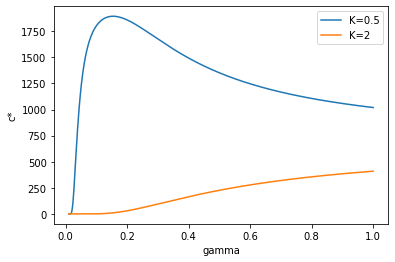

Text(0, 0.5, 'H(x)')

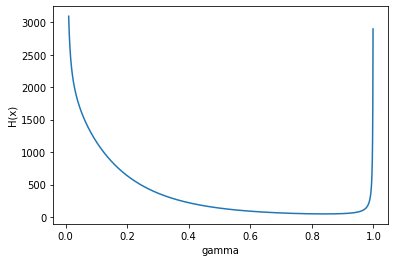

In [55]:
# Study the Dependency of Optimal Control c* and Value Function H(x) on Parameter gamma
k1 = 0.5
k2 = 2
gamma = np.linspace(0.01,1,1000)
c_gamma1 = c_star(0.5,1000,gamma,rho,r,mu,sigma,k1,T)
c_gamma2 = c_star(0.5,1000,gamma,rho,r,mu,sigma,k2,T)
plt.figure()
plt.plot(gamma,c_gamma1,label = 'K=0.5')
plt.plot(gamma,c_gamma2,label = 'K=2')
plt.xlabel('gamma')
plt.ylabel('c*')
plt.legend()
plt.show()

k = 2
gamma = np.linspace(0.01,0.999,100000)
H_gamma = H(0,1000,gamma,rho,r,mu,sigma,k,T)
plt.plot(gamma,H_gamma)
plt.xlabel('gamma')
plt.ylabel('H(x)')

##Distribution of $X_T$

In [ ]:
def a(r, gamma, rho, mu, sigma):
  return (1/gamma) * (r*(1-gamma) - rho + (1-gamma)* (mu-r)**2 /(2*gamma* sigma**2))

def ifQualify(r, gamma, rho, mu, sigma, K, T, t=0): # h(t) must > 0
  alpha = a(r, gamma, rho, mu, sigma)
  return (K**(1/gamma) + 1/alpha)* np.exp(alpha * (T-t)) > 1/alpha


###$X_T(K)$

K =  0.1 , qualified?  True
K =  0.5 , qualified?  True
K =  0.9 , qualified?  True
K =  1.3 , qualified?  True
K =  1.7 , qualified?  True
K =  2.1 , qualified?  True
K =  2.5 , qualified?  True
K =  2.9 , qualified?  True


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


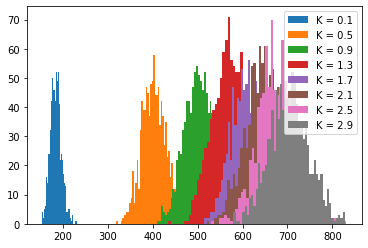

In [ ]:
K_list = np.arange(0.1, 3, 0.4)
K_list = [round(num, 2) for num in K_list]
X, K, mu, r, sigma, gamma, rho, T, M = 1000, 1, 0.1, 0.05, 0.4, 0.05, 0.05, 1, 1000
gamma = 1.5
results_K = np.zeros((M, len(K_list))) # how X variate when K change
performance_K = np.zeros((M, len(K_list))) # how performance change when K change

count = 0
for K in K_list:
  print("K = ", K, ", qualified? ", ifQualify(r, gamma, rho, mu, sigma, K, T, 0))

  optimaldata = OptimalWealthSimulation(X = 1000, K = K, mu=0.1, r=0.05, sigma=0.5, gamma=gamma, rho = 0.05, N=1000, M=1000, T=1)
  #performance_k = np.zeros(M)
  #for i in range(100):
  #  optimaldata = OptimalWealthSimulation(X = 1000, K = K, mu=0.1, r=0.05, sigma=0.5, gamma=gamma, rho = 0.05, N=1000, M=1000, T=1)
  #  alpha = a(r, gamma, rho, mu, sigma)
  #  optimal_mean, _ = performance(data = optimaldata, K=K, gamma=gamma, r=0.05, mu=0.1, rho = 0.05, sigma = 0.5, T=1, N =1000, M=1000, C=c)
  #  performance_k[i] = optimal_mean
  
  results_K[:, count] = optimaldata.iloc[-1]
  #performance_K[:, count] = performance_k
  plt.hist(optimaldata.iloc[1000], bins = 50, label = "K = " + str(K))
  count += 1

plt.legend(loc = "upper right")
plt.savefig('var_K_hist.eps', format='eps')

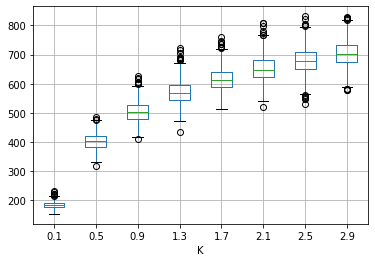

In [ ]:
df = pd.DataFrame(results_K, columns = K_list)
df.boxplot()
plt.xlabel("K")
plt.savefig('var_K_box_pc.eps', format='eps')

In [ ]:
gamma

1.5

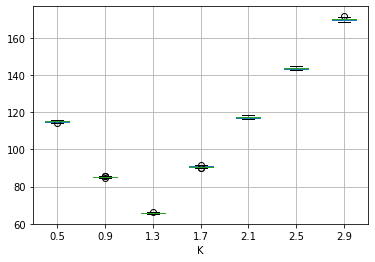

In [ ]:
df = pd.DataFrame(performance_K[:100,1:], columns = K_list[1:])
df.boxplot()
plt.xlabel("K")
plt.savefig('var_K_box_pc.eps', format='eps')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e485ee2d0>,
      dtype=object)

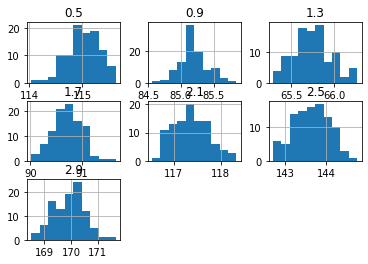

In [ ]:
df.hist()

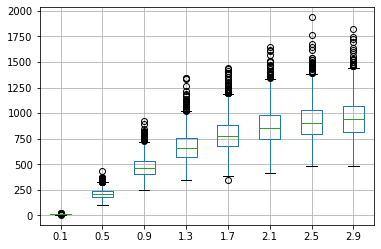

In [ ]:
df = pd.DataFrame(results_K, columns=K_list)
df.boxplot()
plt.savefig('var_K_box.eps', format='eps')

In [ ]:
df = pd.DataFrame(performance_K, columns=K_list)
df.hist()
plt.savefig('var_K_hist_performance.eps', format='eps')

###$X_T(\mu)$ with $0 < \gamma < 1$
Note the behaviour of $X_T$ when $\gamma > 1$ behave similarly as $\gamma > 1$

mu =  -0.21 , qualified?  True
mu =  -0.16 , qualified?  True
mu =  -0.11 , qualified?  True
mu =  -0.06 , qualified?  True
mu =  -0.01 , qualified?  True
mu =  0.04 , qualified?  True
mu =  0.09 , qualified?  True
mu =  0.14 , qualified?  True
mu =  0.19 , qualified?  True
mu =  0.24 , qualified?  True
mu =  0.29 , qualified?  True


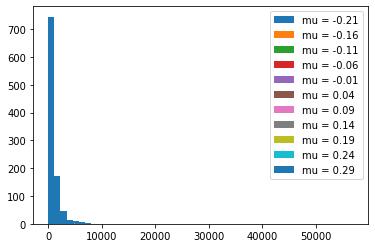

In [ ]:
mu_list = np.arange(-0.21, 0.3, 0.05)
mu_list = [round(num, 2) for num in mu_list]
X, K, mu, r, sigma, gamma, rho, T, M = 1000, 1, 0.1, 0.05, 0.5, 0.5, 0.05, 1, 1000
results = np.zeros((M, len(mu_list)))

performance_MU = np.zeros((100, len(mu_list)))                          
count = 0
for mu in mu_list:
  print("mu = ", mu, ", qualified? ", ifQualify(r, gamma, rho, mu, sigma, K, T, 0))
  optimaldata = OptimalWealthSimulation(X = 1000, K = 1, mu=mu, r=0.05, sigma=0.5, gamma=0.5, rho = 0.05, N=1000, M=1000, T=1)
  #performance_mu = np.zeros(100)
  #for i in range(100):
  #  optimaldata = OptimalWealthSimulation(X = 1000, K = 1, mu=mu, r=0.05, sigma=0.5, gamma=0.5, rho = 0.05, N=1000, M=1000, T=1)
  #  alpha = a(r, gamma, rho, mu, sigma)
  #  optimal_mean, _ = performance(data = optimaldata, K=1, gamma=0.5, r=0.05, mu=mu, rho = 0.05, sigma = 0.5, T=1, N =1000, M=1000, C=c)
  #  performance_mu[i] = optimal_mean
  
  #performance_MU[:, count] = performance_mu
  results[:, count] = optimaldata.iloc[-1]
  count += 1
  plt.hist(optimaldata.iloc[1000], bins = 50, label = "mu = " + str(mu))
plt.legend(loc = "upper right")


Text(0.5, 0, 'mu')

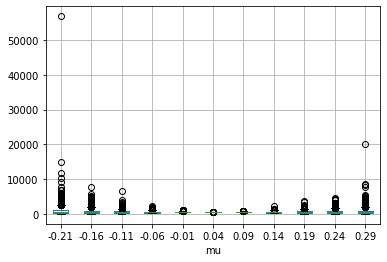

In [ ]:
df = pd.DataFrame(results, columns = mu_list)
df.boxplot()
plt.xlabel("mu")


In [ ]:
df.apply(np.mean, axis = 0)

-0.21    1004.473200
-0.16     783.735140
-0.11     623.203553
-0.06     572.793439
-0.01     538.552384
 0.04     520.219774
 0.09     524.897260
 0.14     557.587812
 0.19     606.611777
 0.24     685.373305
 0.29     806.821874
dtype: float64

In [ ]:
df.apply(np.median, axis = 0)

-0.21    580.420233
-0.16    538.017321
-0.11    510.885510
-0.06    506.241110
-0.01    524.707557
 0.04    519.727177
 0.09    517.190777
 0.14    522.467415
 0.19    523.188454
 0.24    512.750921
 0.29    515.921237
dtype: float64

In [ ]:
df.apply(np.std, axis = 0)

-0.21    2145.958798
-0.16     770.667837
-0.11     459.268134
-0.06     267.130087
-0.01     127.689789
 0.04      20.727781
 0.09      85.179786
 0.14     204.215838
 0.19     364.192399
 0.24     576.115007
 0.29    1054.496296
dtype: float64

In [ ]:
test = OptimalWealthSimulation(X = 1000, K = 1, mu=0.05, r=0.05, sigma=0.5, gamma=0.5, rho = 0.05, N=1000, M=1000, T=1)
print(np.mean(test.iloc[-1]))
print(np.std(test.iloc[-1]))

519.0465862901793
6.252776074688882e-12


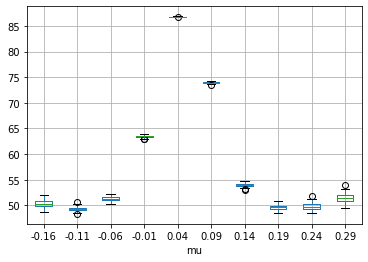

In [ ]:
df = pd.DataFrame(performance_MU, columns = mu_list[:])
df.boxplot()
plt.xlabel("mu")
plt.savefig('var_mu_box_pc.eps', format='eps')
df.to_csv('var_mu_pc.csv')

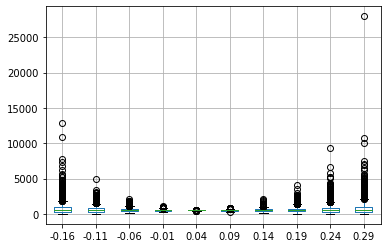

In [ ]:
df = pd.DataFrame(results, columns=mu_list)
df.boxplot()
plt.savefig('var_mu_box.eps', format='eps')

###$X_T(r)$

r =  0.29 , qualified?  True
r =  0.24 , qualified?  True
r =  0.19 , qualified?  True
r =  0.14 , qualified?  True
r =  0.09 , qualified?  True
r =  0.04 , qualified?  True
r =  -0.01 , qualified?  True
r =  -0.06 , qualified?  True
r =  -0.11 , qualified?  True
r =  -0.16 , qualified?  True


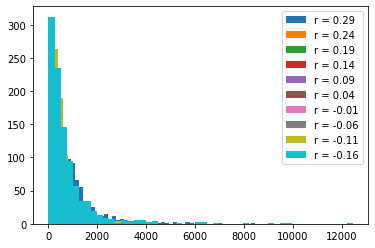

In [ ]:
r_list = np.arange(0.29, -0.21, -0.05)
r_list = [round(num, 2) for num in r_list]
X, K, mu, r, sigma, gamma, rho, T, M = 1000, 1, 0.1, 0.05, 0.4, 0.5, 0.05, 1, 1000
results_r = np.zeros((M, len(r_list)))
performance_R = np.zeros((100, len(r_list)))

count = 0
for r in r_list:
  print("r = ", r, ", qualified? ", ifQualify(r, gamma, rho, mu, sigma, K, T, 0))
  optimaldata = OptimalWealthSimulation(X = 1000, K = 1, mu=0.1, r=r, sigma=0.5, gamma=0.5, rho = 0.05, N=1000, M=1000, T=1)
  #performance_r = np.zeros(100)
  #for i in range(100):
  #  optimaldata = OptimalWealthSimulation(X = 1000, K = 1, mu=0.1, r=r, sigma=0.5, gamma=0.5, rho = 0.05, N=1000, M=1000, T=1)
  #  alpha = a(r, gamma, rho, mu, sigma)
  #  optimal_mean, _ = performance(data = optimaldata, K=1, gamma=0.5, r=r, mu=0.1, rho = 0.05, sigma = 0.5, T=1, N =1000, M=1000, C=c)
  #  performance_r[i] = optimal_mean

  #performance_R[:, count] = performance_r
  results_r[:, count] = optimaldata.iloc[-1]
  plt.hist(optimaldata.iloc[1000], bins = 50, label = "r = " + str(r))
  count += 1
plt.legend(loc = "upper right")
#plt.savefig('var_r_hist.eps', format='eps')

Text(0.5, 0, 'r')

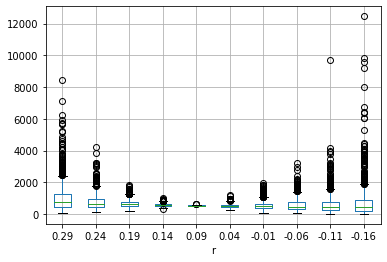

In [ ]:
df = pd.DataFrame(results_r, columns = r_list)
df.boxplot()
plt.xlabel("r")

In [ ]:
df.apply(np.mean, axis = 0)

 0.29    942.954241
 0.24    779.845461
 0.19    661.297079
 0.14    590.964503
 0.09    546.338519
 0.04    527.628585
-0.01    531.753030
-0.06    578.865959
-0.11    648.157033
-0.16    736.065689
dtype: float64

In [ ]:
df.apply(np.median, axis = 0)

 0.29    725.164510
 0.24    662.181271
 0.19    620.591120
 0.14    584.721060
 0.09    545.547163
 0.04    511.325573
-0.01    477.956868
-0.06    461.569322
-0.11    451.772132
-0.16    412.254189
dtype: float64

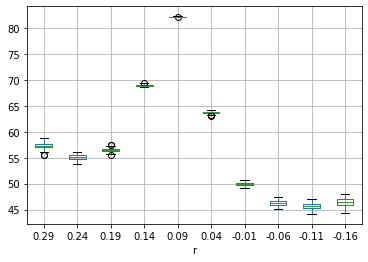

In [ ]:
df = pd.DataFrame(performance_R, columns = r_list)
df.boxplot()
plt.xlabel("r")
plt.savefig('var_r_box_pc.eps', format='eps')
df.to_csv('var_r_pc.csv')

###$X_T(\sigma)$ with $\gamma < 1$

sigma =  0.5 , qualified?  True
sigma =  0.6 , qualified?  True
sigma =  0.7 , qualified?  True
sigma =  0.8 , qualified?  True
sigma =  0.9 , qualified?  True
sigma =  1.0 , qualified?  True
sigma =  1.1 , qualified?  True
sigma =  1.2 , qualified?  True


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


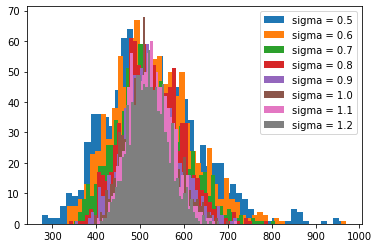

In [ ]:
X, K, mu, r, sigma, gamma, rho, T, M = 1000, 1, 0.1, 0.05, 0.4, 0.5, 0.05, 1, 1000
sig_list = np.arange(0.5, 1.3, 0.1)
sig_list = [round(num, 2) for num in sig_list]
results_sig = np.zeros((M, len(sig_list)))
performance_SIG = np.zeros((100, len(sig_list)))

count = 0
for sigma in sig_list:
  print("sigma = ", sigma, ", qualified? ", ifQualify(r, gamma, rho, mu, sigma, K, T, 0))
  optimaldata = OptimalWealthSimulation(X = 1000, K = 1.0, mu=0.1, r=0.05, sigma=sigma, gamma=0.5, rho = 0.05, N=1000, M=1000, T=1)
  #performance_sig = np.zeros(100)
  #for i in range(100):
  #  optimaldata = OptimalWealthSimulation(X = 1000, K = 1, mu=0.1, r=0.05, sigma=sigma, gamma=0.05, rho = 0.05, N=1000, M=1000, T=1)
  #  alpha = a(r, gamma, rho, mu, sigma)
  #  optimal_mean, _ = performance(data = optimaldata, K=1, gamma=0.05, r=0.05, mu=0.1, rho = 0.05, sigma = sigma, T=1, N =1000, M=1000, C=c)
  #  performance_sig[i] = optimal_mean

  #performance_SIG[:, count] = performance_sig
  results_sig[:, count] = optimaldata.iloc[-1]
  plt.hist(optimaldata.iloc[-1], bins = 50, label = "sigma = " + str(sigma))
  count += 1
plt.legend(loc = "upper right")
plt.savefig('var_sig_hist.eps', format='eps')

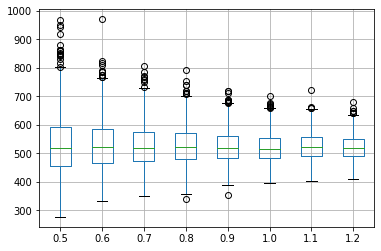

In [ ]:
df = pd.DataFrame(results_sig, columns=sig_list)
df.boxplot()
plt.savefig('var_sig_box.eps', format='eps')

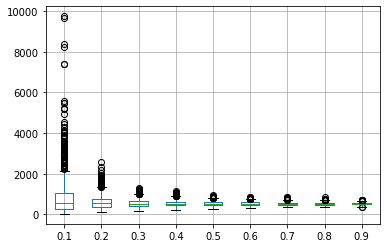

In [ ]:
df = pd.DataFrame(results_sig, columns=sig_list)
df.boxplot()
plt.savefig('var_sig_box.eps', format='eps')

In [ ]:
df.apply(np.mean, axis = 0)

0.1    883.536683
0.2    598.240145
0.3    549.158784
0.4    542.135003
0.5    529.242704
0.6    532.889100
0.7    528.371687
0.8    520.979224
0.9    524.560252
1.0    522.484768
1.1    518.426440
1.2    521.187887
dtype: float64

In [ ]:
df.apply(np.median, axis = 0)

0.1    532.636157
0.2    535.221047
0.3    517.301916
0.4    526.177818
0.5    518.417671
0.6    523.711079
0.7    523.190909
0.8    518.349642
0.9    520.596992
1.0    518.626573
1.1    515.065176
1.2    519.006491
dtype: float64

In [ ]:
df.apply(np.std, axis = 0)

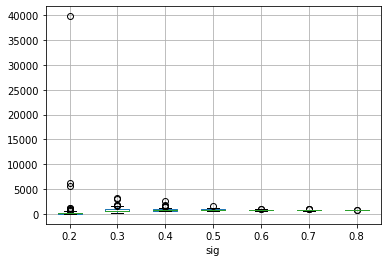

In [ ]:
df = pd.DataFrame(performance_SIG[:, 1:-1], columns = sig_list[1:-1])
df.boxplot()
plt.xlabel("sig")
plt.savefig('var_sig_box_pc.eps', format='eps')
df.to_csv('var_sig_pc.csv')

###$X_T(\sigma)$ with $\gamma > 1$

sigma =  0.5 , qualified?  True
sigma =  0.6 , qualified?  True
sigma =  0.7 , qualified?  True
sigma =  0.8 , qualified?  True
sigma =  0.9 , qualified?  True
sigma =  1.0 , qualified?  True
sigma =  1.1 , qualified?  True
sigma =  1.2 , qualified?  True


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


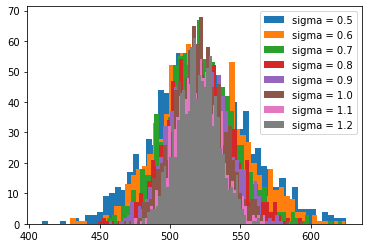

In [ ]:
X, K, mu, r, sigma, gamma, rho, T, M = 1000, 1, 0.1, 0.05, 0.4, 0.5, 0.05, 1, 1000
sig_list = np.arange(0.5, 1.3, 0.1)
sig_list = [round(num, 2) for num in sig_list]
results_sig = np.zeros((M, len(sig_list)))
performance_SIG = np.zeros((100, len(sig_list)))

count = 0
for sigma in sig_list:
  print("sigma = ", sigma, ", qualified? ", ifQualify(r, gamma, rho, mu, sigma, K, T, 0))
  optimaldata = OptimalWealthSimulation(X = 1000, K = 1.0, mu=0.1, r=0.05, sigma=sigma, gamma=1.5, rho = 0.05, N=1000, M=1000, T=1)
  #performance_sig = np.zeros(100)
  #for i in range(100):
  #  optimaldata = OptimalWealthSimulation(X = 1000, K = 1, mu=0.1, r=0.05, sigma=sigma, gamma=0.05, rho = 0.05, N=1000, M=1000, T=1)
  #  alpha = a(r, gamma, rho, mu, sigma)
  #  optimal_mean, _ = performance(data = optimaldata, K=1, gamma=0.05, r=0.05, mu=0.1, rho = 0.05, sigma = sigma, T=1, N =1000, M=1000, C=c)
  #  performance_sig[i] = optimal_mean

  #performance_SIG[:, count] = performance_sig
  results_sig[:, count] = optimaldata.iloc[-1]
  plt.hist(optimaldata.iloc[-1], bins = 50, label = "sigma = " + str(sigma))
  count += 1
plt.legend(loc = "upper right")
plt.savefig('var_sig_hist.eps', format='eps')

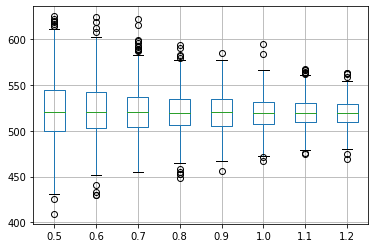

In [ ]:
df = pd.DataFrame(results_sig, columns=sig_list)
df.boxplot()
plt.savefig('var_sig_box.eps', format='eps')

###$X_T(\gamma) with K >= 1$ 

gamma =  0.1 , qualified?  True
gamma =  0.2 , qualified?  True
gamma =  0.3 , qualified?  True
gamma =  0.4 , qualified?  True
gamma =  0.5 , qualified?  True
gamma =  0.6 , qualified?  True
gamma =  0.7 , qualified?  True
gamma =  0.8 , qualified?  True
gamma =  0.9 , qualified?  True


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


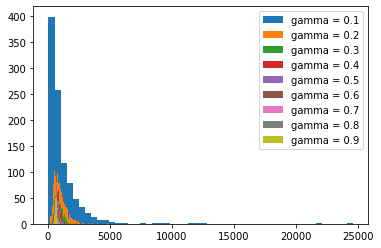

In [ ]:
X, K, mu, r, sigma, gamma, rho, T, M = 1000, 1, 0.1, 0.05, 0.4, 0.05, 0.05, 1, 1000
gamma_list = np.arange(0.1, 1, 0.1)
gamma_list = [round(num, 2) for num in gamma_list]
results_gamma = np.zeros((M, len(gamma_list)))
performance_GA = np.zeros((100, len(gamma_list)))
K  = 1.5
count = 0
for gamma in gamma_list:
  print("gamma = ", gamma, ", qualified? ", ifQualify(r, gamma, rho, mu, sigma, K, T, 0))

  optimaldata = OptimalWealthSimulation(X = 1000, K = K, mu=0.1, r=0.05, sigma=0.5, gamma=gamma, rho = 0.05, N=1000, M=1000, T=1)
  #performance_ga = np.zeros(100)
  #for i in range(100):
  #  optimaldata = OptimalWealthSimulation(X = 1000, K = 1, mu=0.1, r=0.05, sigma=0.5, gamma=gamma, rho = 0.05, N=1000, M=1000, T=1)
  #  alpha = a(r, gamma, rho, mu, sigma)
  #  optimal_mean, _ = performance(data = optimaldata, K=1, gamma=gamma, r=0.05, mu=0.1, rho = 0.05, sigma = 0.5, T=1, N =1000, M=1000, C=c)
  #  performance_ga[i] = optimal_mean
  
  #performance_GA[:, count] = performance_ga
  results_gamma[:, count] = optimaldata.iloc[-1]
  count += 1
  plt.hist(optimaldata.iloc[-1], bins = 50, label = "gamma = " + str(gamma))
plt.legend(loc = "upper right")
plt.savefig('var_gamma_hist_largeK.eps', format='eps')

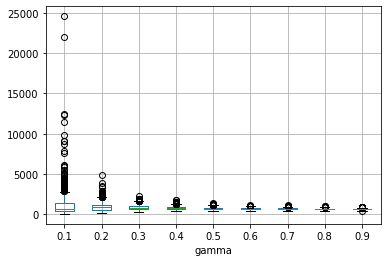

In [ ]:
df = pd.DataFrame(results_gamma, columns = gamma_list)
df.boxplot()
plt.xlabel("gamma")
plt.savefig('var_gamma_box_largeK.eps', format='eps')
#df.to_csv('var_gamma_pc.csv')

In [ ]:
df.apply(np.mean)

2.0    576.720812
2.1    571.392080
2.2    570.696797
2.3    567.118471
2.4    565.167218
2.5    564.133641
2.6    562.002604
2.7    560.159689
2.8    559.118326
2.9    557.475338
dtype: float64

In [ ]:
df.apply(np.median)

0.1    688.934403
0.2    882.010082
0.3    817.847239
0.4    769.220555
0.5    728.730415
0.6    692.909366
0.7    670.150040
0.8    648.774711
0.9    639.114441
1.0    623.591929
1.1    615.802093
1.2    612.781108
1.3    602.756709
1.4    595.846015
dtype: float64

In [ ]:
df.apply(np.std)

0.1    1338.633598
0.2     505.999707
0.3     289.133218
0.4     192.524512
0.5     141.449752
0.6     119.245255
0.7      96.432888
0.8      83.082697
0.9      72.342744
1.0      63.257968
1.1      55.913713
1.2      49.163859
1.3      45.493389
1.4      43.657991
dtype: float64

###$X_T(\gamma) with K < 1$ 

gamma =  0.7 , qualified?  True
gamma =  0.8 , qualified?  True
gamma =  0.9 , qualified?  True
gamma =  1.0 , qualified?  True
gamma =  1.1 , qualified?  True
gamma =  1.2 , qualified?  True
gamma =  1.3 , qualified?  True
gamma =  1.4 , qualified?  True
gamma =  1.5 , qualified?  True
gamma =  1.6 , qualified?  True
gamma =  1.7 , qualified?  True
gamma =  1.8 , qualified?  True


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


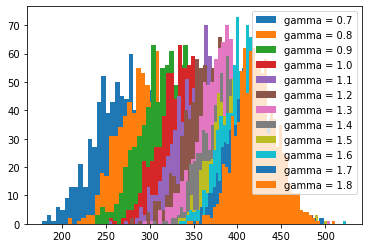

In [ ]:
X, K, mu, r, sigma, gamma, rho, T, M = 1000, 1, 0.1, 0.05, 0.4, 0.05, 0.05, 1, 1000
gamma_list = np.arange(0.7, 1.9, 0.1)
gamma_list = [round(num, 2) for num in gamma_list]
results_gamma = np.zeros((M, len(gamma_list)))
performance_GA = np.zeros((100, len(gamma_list)))
K = 0.5

count = 0
for gamma in gamma_list:
  print("gamma = ", gamma, ", qualified? ", ifQualify(r, gamma, rho, mu, sigma, K, T, 0))

  optimaldata = OptimalWealthSimulation(X = 1000, K = K, mu=0.1, r=0.05, sigma=0.5, gamma=gamma, rho = 0.05, N=1000, M=1000, T=1)
  #performance_ga = np.zeros(100)
  #for i in range(100):
  #  optimaldata = OptimalWealthSimulation(X = 1000, K = 1, mu=0.1, r=0.05, sigma=0.5, gamma=gamma, rho = 0.05, N=1000, M=1000, T=1)
  #  alpha = a(r, gamma, rho, mu, sigma)
  #  optimal_mean, _ = performance(data = optimaldata, K=1, gamma=gamma, r=0.05, mu=0.1, rho = 0.05, sigma = 0.5, T=1, N =1000, M=1000, C=c)
  #  performance_ga[i] = optimal_mean
  
  #performance_GA[:, count] = performance_ga
  results_gamma[:, count] = optimaldata.iloc[-1]
  count += 1
  plt.hist(optimaldata.iloc[-1], bins = 50, label = "gamma = " + str(gamma))
plt.legend(loc = "upper right")
plt.savefig('var_gamma_hist_smallK.eps', format='eps')

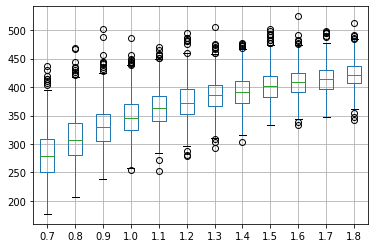

In [ ]:
df = pd.DataFrame(results_gamma, columns=gamma_list)
df.boxplot()
plt.savefig('var_gamma_box_smallK.eps', format='eps')

In [ ]:
df.apply(np.mean)

0.7    282.283904
0.8    310.998382
0.9    330.538046
1.0    347.833063
1.1    363.476403
1.2    374.511580
1.3    385.412324
1.4    392.183056
1.5    402.463963
1.6    408.494605
1.7    414.180607
1.8    421.921105
dtype: float64

In [ ]:
df.apply(np.std)

0.7    41.534375
0.8    40.290983
0.9    37.224451
1.0    34.139496
1.1    33.189601
1.2    32.382445
1.3    28.722650
1.4    27.882969
1.5    27.280301
1.6    25.270241
1.7    24.239185
1.8    23.465886
dtype: float64

In [ ]:
df.apply(np.median)

0.7    278.945960
0.8    307.643232
0.9    329.237861
1.0    345.556332
1.1    363.518805
1.2    372.707281
1.3    385.344046
1.4    391.741838
1.5    401.880195
1.6    408.238226
1.7    414.530305
1.8    421.255544
dtype: float64

###$X_T(\rho)$

rho =  0.1 , qualified?  True
rho =  0.2 , qualified?  True
rho =  0.3 , qualified?  True
rho =  0.4 , qualified?  True
rho =  0.5 , qualified?  True
rho =  0.6 , qualified?  True
rho =  0.7 , qualified?  True
rho =  0.8 , qualified?  True
rho =  0.9 , qualified?  True
rho =  1.0 , qualified?  True


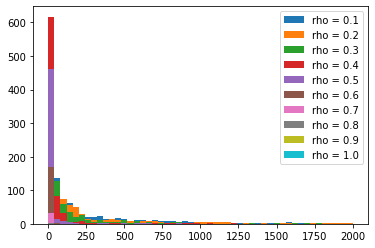

In [ ]:
X, K, mu, r, sigma, gamma, rho, T, M = 1000, 1, 0.1, 0.05, 0.4, 0.05, 0.05, 1, 1000
rho_list = np.arange(0.1, 1.1, 0.1)
rho_list = [round(num, 2) for num in rho_list]
results_rho = np.zeros((M, len(rho_list)))
performance_RHO = np.zeros((100, len(rho_list)))
count = 0
for rho in rho_list:
  print("rho = ", rho, ", qualified? ", ifQualify(r, gamma, rho, mu, sigma, K, T, 0))
  optimaldata = OptimalWealthSimulation(X = 1000, K = 1, mu=0.1, r=0.05, sigma=0.5, gamma=0.05, rho = rho, N=1000, M=1000, T=1)
  #performance_rho = np.zeros(100)
  #for i in range(100):
    
  #  alpha = a(r, gamma, rho, mu, sigma)
  #  optimal_mean, _ = performance(data = optimaldata, K=1, gamma=0.05, r=0.05, mu=0.1, rho = rho, sigma = 0.5, T=1, N =1000, M=1000, C=c)
  #  performance_rho[i] = optimal_mean

  #performance_RHO[:, count] = performance_rho
  results_rho[:, count] = optimaldata.iloc[-1]
  count += 1
  plt.hist(optimaldata.iloc[-1],range = [1,2000], bins = 50, label = "rho = " + str(rho))
plt.legend(loc = "upper right")
#plt.savefig('var_rho_hist.eps', format='eps')

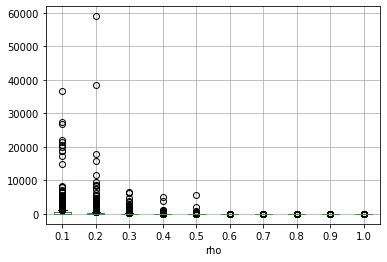

In [ ]:
df = pd.DataFrame(results_rho, columns = rho_list)
df.boxplot()
plt.xlabel("rho")
plt.savefig('var_rho_box_pc.eps', format='eps')
df.to_csv('var_rho_pc.csv')

In [ ]:
df.apply(np.median, axis = 0)

0.1    109.590928
0.2     58.325944
0.3     20.016115
0.4      5.491110
0.5      0.983923
0.6      0.184888
0.7      0.028769
0.8      0.004085
0.9      0.000588
1.0      0.000097
dtype: float64

In [ ]:
df.apply(np.mean, axis = 0)

0.1    730.584321
0.2    486.043494
0.3    133.734436
0.4     40.885858
0.5     17.375831
0.6      0.882937
0.7      0.149065
0.8      0.025630
0.9      0.004034
1.0      0.000701
dtype: float64

In [ ]:
df.apply(np.std, axis = 0)

0.1    2573.594431
0.2    2533.170474
0.3     453.524412
0.4     220.391248
0.5     193.110941
0.6       3.341793
0.7       0.441468
0.8       0.110619
0.9       0.015171
1.0       0.002954
dtype: float64

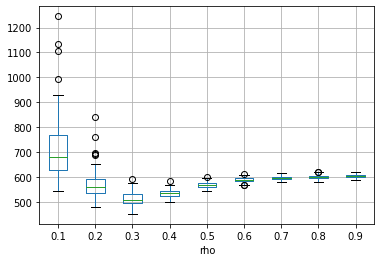

In [ ]:
df = pd.DataFrame(performance_RHO, columns = rho_list)
df.boxplot()
plt.xlabel("rho")
plt.savefig('var_rho_box_pc.eps', format='eps')
df.to_csv('var_rho_pc.csv')

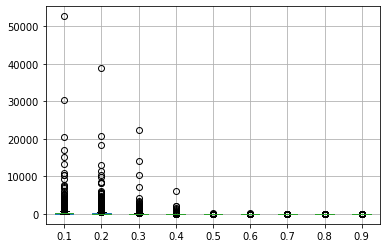

In [ ]:
df = pd.DataFrame(results_rho, columns=rho_list)
df.boxplot()
plt.savefig('var_rho_box.eps', format='eps')